<a href="https://colab.research.google.com/github/yuvi00001/Handling-missing-values-using-SimpleImputer/blob/main/missing_values_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION - HEART DISEASE PREDICTION

Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/framingham.csv')
columns = data.columns
j = 0

for i in range(len(columns)):
  missing_val = data[data.columns[i]].isnull().sum()
  percentage = missing_val/len(data)*100
  if missing_val==0:
    pass
  else:
    j+=1
    print('{}. {} has {} missing values, percentage being {}'.format(j,data.columns[i],missing_val,percentage))


1. education has 105 missing values, percentage being 2.4775837659273243
2. cigsPerDay has 29 missing values, percentage being 0.684285040113261
3. BPMeds has 53 missing values, percentage being 1.2505899008966492
4. totChol has 50 missing values, percentage being 1.1798017932987257
5. BMI has 19 missing values, percentage being 0.4483246814535158
6. heartRate has 1 missing values, percentage being 0.023596035865974516
7. glucose has 388 missing values, percentage being 9.155261915998112


Visualizing the missing values using **heatmap**.

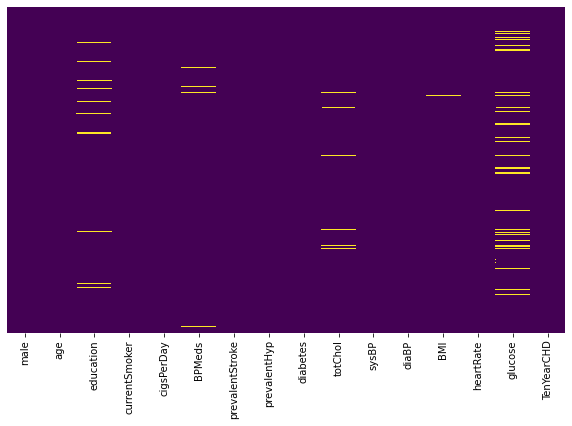

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cbar=False,cmap='viridis',yticklabels=False)

Handling the **missing values** using **SimpleImputer**, replacing missing values by **mean**.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
X = data.values
Y = X[:,-1]
X = X[:,:-1]

X_trans = imputer.fit_transform(X)

'first X had {} NaN values after Imputing it has {} NaN values'.format(np.isnan(X).sum(),np.isnan(X_trans).sum())

'first X had 645 NaN values after Imputing it has 0 NaN values'

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

strategies = ['mean','median','most_frequent','constant']
result = []

model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

for s in strategies:
  pipe = Pipeline([('impute',SimpleImputer(strategy=s)),('model',model)])
  score = cross_val_score(pipe,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
  result.append(score)

In [ ]:
#score for different strategies in SimpleImputer

for i in range(len(result)):
  print('For strategy {} ,mean score is {}, max being {} '.format(strategies[i],np.mean(result[i]),np.max(result[i])))

For strategy mean ,mean score is 0.8483585351710603, max being 0.8628841607565012 
For strategy median ,mean score is 0.8481236153857591, max being 0.8628841607565012 
For strategy most_frequent ,mean score is 0.8491459996728964, max being 0.8628841607565012 
For strategy constant ,mean score is 0.8492242443165768, max being 0.8605200945626478 
